Mejores hiperparámetros: {'classifier__C': 10, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}


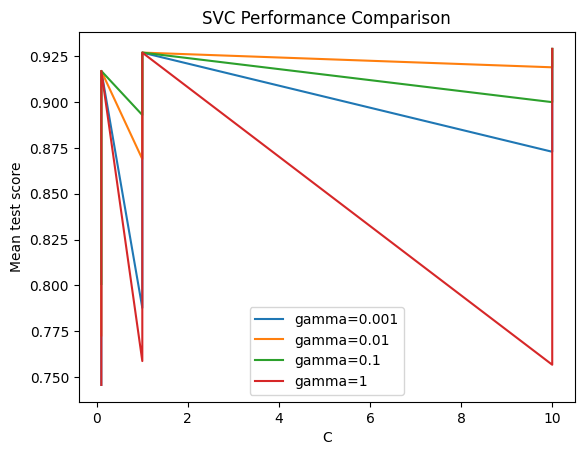

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Cargar datasets
train_data = pd.read_csv('/datasetv2train.csv')
test_data = pd.read_csv('datasetv2.csv')  # Este dataset no tiene la columna 'target'

# Separar características y variable objetivo
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Listas de columnas numéricas y categóricas
num_columns = ['OWN_CAR_AGE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
               'CNT_FAM_MEMBERS', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG',
               'COMMONAREA_AVG', 'FLOORSMAX_AVG']
cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']

# Preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)])

# Crear el pipeline del modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])

# Entrenar el modelo
pipeline.fit(X_train, y_train)


# Predecir en el conjunto de prueba
X_test = test_data.drop('target', axis=1)  # Asumiendo que 'target' existe pero está vacía
predictions = pipeline.predict(X_test)

# Si quieres obtener las probabilidades
# probabilities = pipeline.predict_proba(X_test)

# Guardar las predicciones en el dataset de prueba
test_data['target'] = predictions

# Guardar el dataset de prueba con las predicciones
test_data.to_csv('predictions.csv', index=False)

# Si tienes un conjunto de validación, puedes medir la precisión del modelo
# X_val, y_val = # tus datos de validación
# predictions_val = pipeline.predict(X_val)
#print(classification_report(y_val, predictions_val))






import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Cargar datasets
train_data = pd.read_csv('/datasetv2train.csv')
test_data = pd.read_csv('datasetv2.csv')  # Este dataset no tiene la columna 'target'

# Separar características y variable objetivo
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Crear el pipeline del modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print('Mejores hiperparámetros:', best_params)

# Resultados en una DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Visualizar los resultados
# Podemos graficar, por ejemplo, cómo el parámetro C afecta la precisión media de validación
for gamma in param_grid['classifier__gamma']:
    subset = results[results['param_classifier__gamma'] == gamma]
    plt.plot(subset['param_classifier__C'], subset['mean_test_score'], label=f'gamma={gamma}')

plt.xlabel('C')
plt.ylabel('Mean test score')
plt.legend()
plt.title('SVC Performance Comparison')
plt.show()
